# Regularização_res

In [86]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

In [105]:
df=pd.read_csv('c:\\dados\\cars-uci-linked.csv',sep=';')
df=df.dropna()
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8          3070       130.0    3504           120    70   
1  15.0          8          3500       165.0    3693           115    70   
2  18.0          8          3180       150.0    3436           110    70   
3  16.0          8          3040       150.0    3433           120    70   
4  17.0          8          3020       140.0    3449           105    70   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino

In [106]:
def standard(s):
    m=s.mean()
    d=s.std()
    s=(s-m)/d
    return (s)

In [107]:
df['hps']=standard(df['horsepower'])

In [108]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8          3070       130.0    3504           120    70   
1  15.0          8          3500       165.0    3693           115    70   
2  18.0          8          3180       150.0    3436           110    70   
3  16.0          8          3040       150.0    3433           120    70   
4  17.0          8          3020       140.0    3449           105    70   

   origin                       name       hps  
0       1  chevrolet chevelle malibu  0.663285  
1       1          buick skylark 320  1.572585  
2       1         plymouth satellite  1.182885  
3       1              amc rebel sst  1.182885  
4       1                ford torino  0.923085

Escrever as funções Erro médio quadrático e o respectivo gradiente (já fizemos isso em outra aula...)

In [92]:
#complete o código
def grademq(X,theta,y):
    return (1/len(y))*(np.dot(X.T,np.dot(X,theta)-y))

In [93]:
#complete o código
def emq(ye,y):
    dif=ye-y
    return (1/len(y))*np.inner(dif,dif)
    

In [ ]:
Crie as matrizes X e y com potência com expoente 1 a 7

In [109]:
df['horsepower'].mean(),df['horsepower'].std()

(104.46938775510205, 38.49115993282855)

In [164]:
X=np.ones((len(df),8))
for i in range(1,8):
    X[:,i]=df['hps']**i
y=np.array(df['mpg'])

In [165]:
X[:3]

array([[ 1.        ,  0.66328508,  0.4399471 ,  0.29181035,  0.19355345,
         0.12838112,  0.08515328,  0.0564809 ],
       [ 1.        ,  1.57258478,  2.47302289,  3.88903815,  6.1158422 ,
         9.61768036, 15.12461775, 23.78474366],
       [ 1.        ,  1.18288491,  1.39921671,  1.65511233,  1.9578074 ,
         2.31586083,  2.73939683,  3.24039117]])

Faça Gradient descent até boa convergência (?) 

In [181]:
le=[]
theta=np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
ye=np.dot(X,theta)
le.append(emq(ye,y))

for i in range(300000):
    g=grademq(X,theta,y)
    theta=theta-g*0.00001
    ye=np.dot(X,theta)
    e=emq(ye,y)
    le.append(e)


Apresente os thetas e o gráfico do erro médio quadrático

In [183]:
theta

array([18.11600546, -6.1424443 ,  5.20135652, -2.88026188,  1.43913794,
        0.73774819, -0.89218266,  0.18059256])

Apresente o 

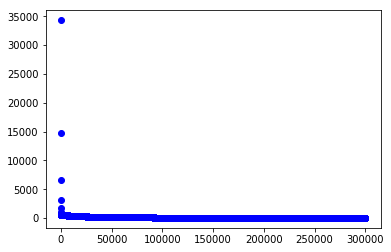

In [169]:
plt.plot(le[1:],'bo')
plt.show()

Apresente a predição para todo o dataset com regularização

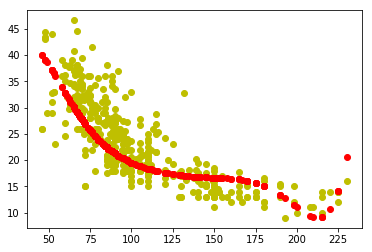

In [179]:

plt.plot(df['horsepower'],df['mpg'],'yo')
plt.plot(df['horsepower'],yer,'ro')
plt.show()

Incluir Regularização em uma nova função gradiente

In [171]:
def grademqr(X,theta,y,lamb):
    reg=theta*lamb
    reg[0]=0.0
    return (1/len(y))*(np.dot(X.T,np.dot(X,theta)-y)+reg)

Refazer gradient descent com gradiente regularizado 

In [176]:
ler=[]
thetar=np.array([0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5])
ye=np.dot(X,thetar)
le.append(emq(ye,y))

for i in range(300000):
    g=grademqr(X,thetar,y,100)
    thetar=thetar-g*0.00001
    yer=np.dot(X,thetar)
    e=emq(yer,y)
    ler.append(e)


Apresente os gráficos com a

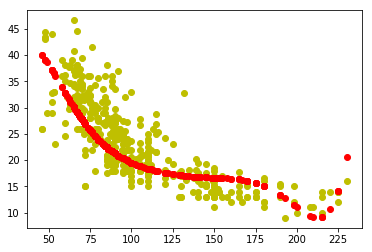

In [177]:
plt.plot(df['horsepower'],df['mpg'],'yo')
plt.plot(df['horsepower'],yer,'ro')
plt.show()

Compare thetas (com e sem regularização)

In [184]:
theta,thetar

(array([18.11600546, -6.1424443 ,  5.20135652, -2.88026188,  1.43913794,
         0.73774819, -0.89218266,  0.18059256]),
 array([18.96596124, -4.43334166,  3.45315118, -2.24647329,  1.1542016 ,
         0.14043783, -0.40089546,  0.09105774]))

Compare pos erros médios quadráticos finais. Explique'

In [186]:
le[-1],ler[-1]

(23.87824136470098, 25.47611407299136)